<a href="https://colab.research.google.com/github/LizzyZhang-tutu/Pytorch_Learning/blob/master/PyTorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

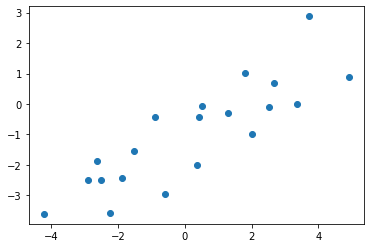

In [ ]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, 5)
X = np.random.random(N) * 10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

# Plot data
plt.scatter(X, Y)

In [ ]:
# Create Linear Regression Model
model = nn.Linear(1, 1)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [ ]:
type(inputs)

torch.Tensor

In [ ]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

  

Epoch 1/30, Loss: 4.2656
Epoch 2/30, Loss: 2.8664
Epoch 3/30, Loss: 2.1075
Epoch 4/30, Loss: 1.6273
Epoch 5/30, Loss: 1.3191
Epoch 6/30, Loss: 1.1210
Epoch 7/30, Loss: 0.9937
Epoch 8/30, Loss: 0.9119
Epoch 9/30, Loss: 0.8593
Epoch 10/30, Loss: 0.8255
Epoch 11/30, Loss: 0.8037
Epoch 12/30, Loss: 0.7898
Epoch 13/30, Loss: 0.7808
Epoch 14/30, Loss: 0.7750
Epoch 15/30, Loss: 0.7713
Epoch 16/30, Loss: 0.7689
Epoch 17/30, Loss: 0.7674
Epoch 18/30, Loss: 0.7664
Epoch 19/30, Loss: 0.7658
Epoch 20/30, Loss: 0.7654
Epoch 21/30, Loss: 0.7651
Epoch 22/30, Loss: 0.7649
Epoch 23/30, Loss: 0.7648
Epoch 24/30, Loss: 0.7648
Epoch 25/30, Loss: 0.7647
Epoch 26/30, Loss: 0.7647
Epoch 27/30, Loss: 0.7647
Epoch 28/30, Loss: 0.7647
Epoch 29/30, Loss: 0.7647
Epoch 30/30, Loss: 0.7647


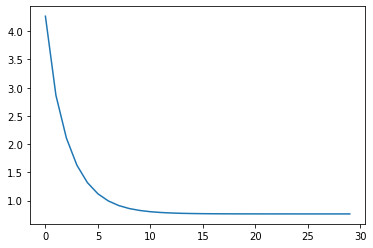

In [ ]:
# Plot the loss per iteration
plt.plot(losses)

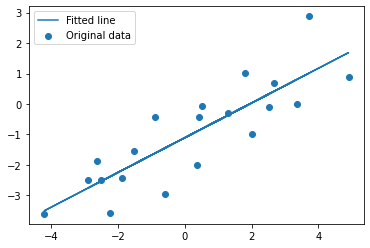

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# Another way
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[ 1.0073639 ],
       [-1.6091948 ],
       [-2.1696496 ],
       [-2.6121264 ],
       [-2.5363057 ],
       [-2.3891048 ],
       [ 0.41340876],
       [-2.7505903 ],
       [ 0.800174  ],
       [-0.8079121 ],
       [ 0.03538573],
       [-1.4355586 ],
       [-3.5048108 ],
       [ 1.6868287 ],
       [-0.8566202 ],
       [ 0.33387995],
       [-0.90320635],
       [-0.3606454 ],
       [-1.9720399 ],
       [-0.0868243 ]], dtype=float32)

In [ ]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.57015616]] [-1.1063501]
